# 11.0 Playing with Hyper parameters using Grid Search CV

Youtube video [Machine Learning Tutorial Python - 16: Hyper parameter Tuning (GridSearchCV)](https://www.youtube.com/watch?v=HdlDYng8g9s&ab_channel=codebasics)


Github + paper [Hyperparameter Optimization of Machine Learning Algorithms](https://github.com/prvnktech/007-Hyperparameter-Optimization-in-ML)

# Finding best model and hyper parameter tunning using GridSearchCV

### For iris flower dataset in sklearn library, we are going to find out best model and best hyper parameters using GridSearchCV.

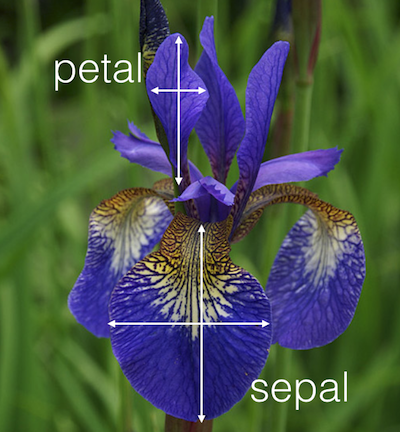

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

## 1 Load ***iris flower*** dataset

In [1]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:150]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
47                 4.6               3.2                1.4               0.2   
48                 5.3               3.7                1.5               0.2   
49                 5.0               3.3                1.4               0.2   
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         flower  
47       setosa  
48       setosa  
49       setosa  
50   versicolor  
51   versicolor  
..          ...  
145   virginica  
146   virginica  
147   virginica  
148   virginica  
149   virginica  

[103 rows x 5 columns]

## 2 Different approaches how to find the best hyperparameters

### 2.1 Approach 1: Use train_test_split and manually tune parameters by trial and error

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [10]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9777777777777777

### 2.2 Approach 2: Use K-Fold Cross Validation

Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation.

In [11]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [12]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [13]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)


array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

Above approach is tiresome and very manual. We can use for loop as an alternative.

In [16]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

### ***Conclusion:*** From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance.

### 2.3 Approach 3: Use GridSearchCV

#### GridSearchCV does exactly same thing as for loop above but in a single line of code.

In [17]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00115247, 0.00075378, 0.00116062, 0.00060782, 0.00069566,
        0.00054994]),
 'std_fit_time': array([3.34711576e-04, 7.19827663e-05, 5.93705252e-04, 1.48477827e-04,
        1.02032835e-04, 5.28856479e-05]),
 'mean_score_time': array([0.00139332, 0.00049176, 0.00070963, 0.00034957, 0.00049696,
        0.00038252]),
 'std_score_time': array([8.00279086e-04, 7.91898042e-05, 3.23602108e-04, 1.28731903e-05,
        1.14541169e-04, 6.78992673e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [18]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.001152      0.000335         0.001393        0.000800       1   
1       0.000754      0.000072         0.000492        0.000079       1   
2       0.001161      0.000594         0.000710        0.000324      10   
3       0.000608      0.000148         0.000350        0.000013      10   
4       0.000696      0.000102         0.000497        0.000115      20   
5       0.000550      0.000053         0.000383        0.000068      20   

  param_kernel                         params  split0_test_score  \
0          rbf      {'C': 1, 'kernel': 'rbf'}           0.966667   
1       linear   {'C': 1, 'kernel': 'linear'}           0.966667   
2          rbf     {'C': 10, 'kernel': 'rbf'}           0.966667   
3       linear  {'C': 10, 'kernel': 'linear'}           1.000000   
4          rbf     {'C': 20, 'kernel': 'rbf'}           0.966667   
5       linear  {'C': 20, 'kernel': 'linear'}           1.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0           0.966667           0.966667                1.0   
1                1.0           0.966667           0.966667                1.0   
2                1.0           0.966667           0.966667                1.0   
3                1.0           0.900000           0.966667                1.0   
4                1.0           0.900000           0.966667                1.0   
5                1.0           0.900000           0.933333                1.0   

   mean_test_score  std_test_score  rank_test_score  
0         0.980000        0.016330                1  
1         0.980000        0.016330                1  
2         0.980000        0.016330                1  
3         0.973333        0.038873                4  
4         0.966667        0.036515                5  
5         0.966667        0.042164                6

In [19]:
df[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1          rbf         0.980000
1       1       linear         0.980000
2      10          rbf         0.980000
3      10       linear         0.973333
4      20          rbf         0.966667
5      20       linear         0.966667

In [20]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [21]:
clf.best_score_

0.9800000000000001

In [22]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs

#### Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation.

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0      10          rbf         0.980000
1      20       linear         0.966667

##### How about different models with different hyperparameters?

In [24]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [26]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                best_params
0                  svm    0.980000  {'C': 1, 'kernel': 'rbf'}
1        random_forest    0.966667       {'n_estimators': 10}
2  logistic_regression    0.966667                   {'C': 5}

### ***Conclusion:*** Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification.

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***